In [56]:
import pandas as pd
import numpy as np
from numpy import cov

import matplotlib.pyplot as plt
import matplotlib.cm as cm
# multivariate linear regression with regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# support vector machine regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# neural network
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
# normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
# score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
# import keras
import tensorflow.keras
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
# import regularizer
from tensorflow.keras.regularizers import l1, l2
# import matplotlib
import matplotlib.pyplot as plt
# os
# randomseed

from numpy.random import seed
from numpy import asarray
from numpy import savetxt
###############################3
import os
import pickle
from calendar import monthrange
Rootmean=tensorflow.keras.metrics.RootMeanSquaredError()

In [57]:
area_df     = pd.read_excel('area_2003-2019.xls', sheet_name = 'Sheet1')
lychee_yield_df = pd.read_excel('lycheeproduct.xlsx')
humidChiangrai=pd.read_excel('humidchiangrai.xlsx',sheet_name = 'Sheet2')
tempchiangrai=pd.read_excel('temperaturechiangrai.xlsx',sheet_name = 'Sheet2')
rainchiangrai=pd.read_excel('rainchiangrai.xlsx')
tempchiangrai=tempchiangrai.iloc[:,0:12]
humidChiangrai=humidChiangrai.iloc[:,0:12]
print(tempchiangrai)

JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
0   19.9  21.0  24.2  27.0  26.6  27.4  26.8  27.0  26.4  24.9  21.4  20.5
1   20.2  21.7  24.8  27.2  26.6  27.2  26.3  26.3  26.8  25.9  22.1  19.1
2   19.5  22.8  24.7  27.1  27.5  27.0  27.2  27.0  27.1  26.4  23.0  20.5
3   21.9  22.3  24.5  28.5  29.0  28.6  27.4  26.7  26.7  25.9  22.6  21.8
4   20.8  22.0  23.6  25.7  26.7  27.4  27.2  26.3  26.7  25.6  22.4  20.3
5   20.6  22.8  24.6  27.5  27.4  27.6  26.5  26.9  26.5  26.1  25.2  22.1
6   21.1  24.1  24.2  28.5  28.2  27.6  26.8  26.7  26.3  24.5  24.0  18.5
7   19.3  22.0  24.6  27.3  27.9  28.0  26.9  26.5  26.8  25.8  24.1  20.9
8   19.6  21.7  25.1  26.4  28.5  28.7  27.7  27.2  27.2  25.6  24.6  21.7
9   19.0  21.6  26.1  29.5  28.9  27.5  26.8  27.1  27.1  26.5  24.6  21.7
10  21.5  22.8  25.9  26.7  27.6  27.8  26.8  27.1  27.0  26.1  24.2  20.7
11  21.0  22.6  24.7  25.9  27.0  27.1  27.3  26.8  27.3  26.1  23.1  22.5


In [58]:
rainchiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Rainfall')
pressurechiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Pressure')
pheno=pd.read_excel('cm_met_Chiangrai.xlsx',sheet_name='pheno')

rainchiangrai=rainchiangrai.iloc[0,1:]
rainchiangrai=rainchiangrai.to_numpy()
rainchiangrai=rainchiangrai.reshape(12,13)
rainchiangrai=np.delete(rainchiangrai,12,1)
###############################################3
pressurechiangrai=pressurechiangrai.iloc[0,1:]
pressurechiangrai=pressurechiangrai.to_numpy()
pressurechiangrai=pressurechiangrai.reshape(12,13)
pressurechiangrai=np.delete(pressurechiangrai,12,1)
#########################################################
pheno=pheno.iloc[3,2:]
pheno=pheno.to_numpy()
pheno=pheno.reshape(12,12)
########################################################

inputchiangrai=pd.read_excel('input.xlsx')
Y_chiangrai=inputchiangrai.iloc[3:,3]
inputchiangrai=inputchiangrai.iloc[3:,:4]
inputchiangrai=inputchiangrai.to_numpy()
#######################################################################
Y_chiangrai=Y_chiangrai.to_numpy()
tempchiangrai=tempchiangrai.to_numpy()

humidChiangrai=humidChiangrai.to_numpy()

print(humidChiangrai.shape)

(12, 12)


In [59]:
####################DATAINPUT##########################################33
X_chiangrai=inputchiangrai[:,0:3]
X_chiangrai=np.concatenate((tempchiangrai[:,0:2],X_chiangrai),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pheno[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,rainchiangrai[:,2:4]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,humidChiangrai[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pressurechiangrai[:,0:2]),axis=1)

In [60]:
X_chiangrai=X_chiangrai[:,[2,3,4]]

In [61]:
X_chiangrai_RNN=X_chiangrai.reshape(X_chiangrai.shape[0],1,X_chiangrai.shape[1])

In [62]:
n_size=X_chiangrai.shape[0]

X_train, X_test, Y_train, Y_test =  train_test_split(X_chiangrai_RNN, Y_chiangrai, test_size=0.3)
X_train_ord = X_chiangrai_RNN[:int(n_size*(1-0.3)),:,:]
X_test_ord  = X_chiangrai_RNN[int(n_size*(1-0.3)):,:,:]
Y_train_ord = Y_chiangrai[:int(n_size*(1-0.3))]
Y_test_ord  = Y_chiangrai[int(n_size*(1-0.3)):]

In [63]:
X_train=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)

In [64]:
rnn = Sequential()
rnn.add(GRU(100, activation='relu', return_sequences=True, input_shape=(X_chiangrai_RNN.shape[1],X_chiangrai_RNN.shape[2])))
rnn.add(Dropout(0.4))
rnn.add(GRU(100, activation='relu', return_sequences=True))
rnn.add(Dropout(0.4))
rnn.add(GRU(100, activation='relu'))    
    # rnn.add(BatchNormalization())    
rnn.add(Dropout(0.4))
rnn.add(Dense(50, activation='relu'))
rnn.add(Dropout(0.4))    
rnn.add(Dense(1, activation='relu'))
rnn.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [65]:
rnn.fit(X_train_ord, Y_train_ord, epochs=100, batch_size=32, verbose=1)


Train on 8 samples
Epoch 1/100
8/8 [==============================] - 5s 680ms/sample - loss: 160850704.0000 - root_mean_squared_error: 12682.6934 - mae: 11800.9551 - mape: 96.7189
Epoch 2/100
8/8 [==============================] - 0s 3ms/sample - loss: 153850208.0000 - root_mean_squared_error: 12403.6367 - mae: 11715.1182 - mape: 97.5111
Epoch 3/100
8/8 [==============================] - 0s 3ms/sample - loss: 157579440.0000 - root_mean_squared_error: 12553.0654 - mae: 11703.6104 - mape: 96.2601
Epoch 4/100
8/8 [==============================] - 0s 3ms/sample - loss: 158382032.0000 - root_mean_squared_error: 12584.9922 - mae: 11783.8887 - mape: 97.3931
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 166867232.0000 - root_mean_squared_error: 12917.7100 - mae: 12059.3389 - mape: 99.1591
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 159481312.0000 - root_mean_squared_error: 12628.5908 - mae: 11778.6680 - mape: 96.9409
Epoch 7/100
8/8 [==

In [66]:
X_chiangrai_RNN=K.constant(X_chiangrai_RNN)

In [67]:
y_pred=rnn.predict(X_chiangrai_RNN)
y_pred=y_pred.reshape(12,)
print(y_pred)

[12015.911  10789.262   8732.907   8736.345   7959.212   7879.608
  7489.326   5692.9507  4798.5854  4555.408   4529.1543  4364.9834]


In [68]:
accuracy=rnn.evaluate(X_train_ord, Y_train_ord)


8/1 [================================================================================================================================================================================================================================================] - 1s 82ms/sample - loss: 23022282.0000 - root_mean_squared_error: 4798.1538 - mae: 3465.9346 - mape: 23.3309


In [69]:
accuracy=rnn.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 3ms/sample - loss: 927763.1250 - root_mean_squared_error: 963.2046 - mae: 885.2172 - mape: 15.8432


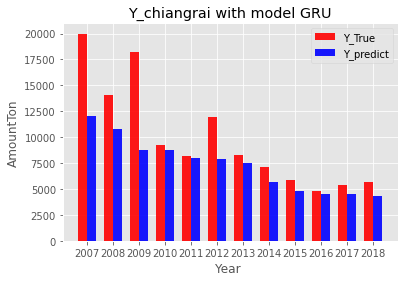

In [70]:
plt.style.use('ggplot')
n = X_chiangrai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y_chiangrai, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Y_chiangrai with model GRU')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()